This notebook is a simple introduction to the use of the Pycaret library on tytanic data. First it is graphics to have an intuition on the data and then the modeling part.

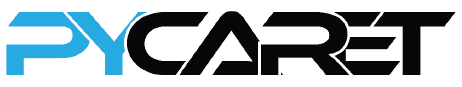

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

To discover more functionality of pycaret I invite you to consult the official site <a href="https://pycaret.org/">pycaret</a>.

# Contents

* [<font size=4>Library and Data</font>](#1)
* [<font size=4>Train Data Report</font>](#2)
* [<font size=4>Test Data Report</font>](#3)
* [<font size=4>Pclass</font>](#4)
* [<font size=4>Sex</font>](#5)
* [<font size=4>SibSp</font>](#6)
* [<font size=4>Embarked</font>](#7)
* [<font size=4>Age</font>](#8)
* [<font size=4>Survived</font>](#9)
* [<font size=4>Setting Up Environment</font>](#10)
* [<font size=4>Compare Models</font>](#11)
* [<font size=4>Create Model</font>](#12)
* [<font size=4>Tune Model</font>](#13)
* [<font size=4>Plot Model</font>](#14)
 *     [Learning Curve](#14.1)
 *     [Features Importance](#14.2)
 *     [ROC Curve](#14.3)
 *     [Confusion Matrix](#14.4)
* [<font size=4>Model Interpretation</font>](#15)
* [<font size=4>Make Prediction</font>](#16)
* [<font size=4>Submit Result</font>](#17)

# Library and Data <a id="1"></a>

In [1]:
!pip install pycaret

from pycaret.classification import *
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

     |████████████████████████████████| 188 kB 7.4 MB/s 
     |████████████████████████████████| 259 kB 17.6 MB/s 
     |████████████████████████████████| 93 kB 879 kB/s 
     |████████████████████████████████| 3.1 MB 20.6 MB/s 
     |████████████████████████████████| 60 kB 5.9 MB/s 
     |████████████████████████████████| 142.8 MB 34 kB/s 
     |████████████████████████████████| 127 kB 20.2 MB/s 
     |████████████████████████████████| 378 kB 36.6 MB/s 
     |████████████████████████████████| 7.0 MB 32.4 MB/s 
     |████████████████████████████████| 7.3 MB 17.9 MB/s 
     |████████████████████████████████| 81 kB 4.3 MB/s 
     |████████████████████████████████| 63.9 MB 3.3 kB/s 
     |████████████████████████████████| 2.1 MB 38.4 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 6.2 MB 51.1 MB/s 
     |████████████████████████████████| 235 kB 45.3 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for shap:

# Train Data Report  <a id="2"></a>

In [2]:
report_train = ProfileReport(train)
report_train

# Test Data Report <a id="3"></a>

In [3]:
report_test = ProfileReport(test)
report_test

# Pclass <a id="4"></a>

In [4]:
train_tmp = train.copy()
test_tmp = test.copy()
train_tmp['type'] = 'train'
train_tmp.drop('Survived', axis = 1, inplace = True)
test_tmp['type'] = 'test'
data = pd.concat([train_tmp, test_tmp], ignore_index = True)

dfplot = data.groupby(['type','Pclass']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Pclass'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Pclass'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Pclass")
fig.show()

# Sex <a id="5"></a>

In [5]:
dfplot = data.groupby(['type','Sex']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Sex'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Sex'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Sex")
fig.show()

# sibSp <a id="6"></a>

In [6]:
dfplot = data.groupby(['type','SibSp']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['SibSp'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['SibSp'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="SibSp")
fig.show()

# Embarked <a id="7"></a>

In [7]:
dfplot = data.groupby(['type','Embarked']).count()['PassengerId'].to_frame().reset_index()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Test', 'Train'])
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'test']['Embarked'], values=dfplot[dfplot['type'] == 'test']['PassengerId'], name="test"),
              1, 1)
fig.add_trace(go.Pie(labels=dfplot[dfplot['type'] == 'train']['Embarked'], values=dfplot[dfplot['type'] == 'train']['PassengerId'], name="train"),
              1, 2)
fig.update_layout(
    title_text="Embarked")
fig.show()

# Age <a id="8"></a>

In [8]:
fig = px.violin(train, y="Age", x="Survived", color="Sex", box=True, points="all", hover_data=['Age', 'Survived', 'Sex'])
fig.show()

# Survived <a id="9"></a>

In [9]:
fig = px.violin(train, y="Fare", x="Survived", color="Sex", box=True, points="all", hover_data=['Fare', 'Survived', 'Sex'])
fig.show()

# Setting up Environment <a id="10"></a>

In [10]:
env = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True,
            remove_outliers = True,
            normalize = True)

 
Setup Succesfully Completed!


# Compare Models <a id="11"></a>

In [11]:
compare_models()

# Create Model <a id="12"></a>

In [12]:
xgb = create_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7333  0.7791  0.5652  0.6842  0.6190  0.4168
1       0.9000  0.9524  0.7826  0.9474  0.8571  0.7813
2       0.7627  0.7687  0.5652  0.7647  0.6500  0.4766
3       0.8136  0.9149  0.7391  0.7727  0.7556  0.6050
4       0.7627  0.8961  0.7391  0.6800  0.7083  0.5089
5       0.8305  0.9034  0.7391  0.8095  0.7727  0.6380
6       0.8136  0.8460  0.7391  0.7727  0.7556  0.6050
7       0.6780  0.7971  0.3913  0.6429  0.4865  0.2716
8       0.8305  0.8780  0.7391  0.8095  0.7727  0.6380
9       0.7797  0.8502  0.6522  0.7500  0.6977  0.5257
Mean    0.7905  0.8586  0.6652  0.7634  0.7075  0.5467
SD      0.0582  0.0585  0.1167  0.0814  0.0978  0.1334

# Tune Model <a id="13"></a>

In [13]:
tuned_xgb = tune_model('xgboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7000  0.7556  0.6087  0.6087  0.6087  0.3655
1       0.8667  0.9389  0.8261  0.8261  0.8261  0.7180
2       0.7627  0.7935  0.6087  0.7368  0.6667  0.4850
3       0.7966  0.9022  0.7391  0.7391  0.7391  0.5725
4       0.7966  0.8992  0.8261  0.7037  0.7600  0.5855
5       0.8475  0.9251  0.7826  0.8182  0.8000  0.6768
6       0.7797  0.8104  0.6957  0.7273  0.7111  0.5332
7       0.7288  0.7633  0.5217  0.7059  0.6000  0.4018
8       0.8136  0.8647  0.6957  0.8000  0.7442  0.5986
9       0.8305  0.8442  0.7826  0.7826  0.7826  0.6437
Mean    0.7923  0.8497  0.7087  0.7448  0.7238  0.5581
SD      0.0491  0.0633  0.0973  0.0621  0.0733  0.1082

# Plot Model <a id="14"></a>

## Learning Curve <a id="14.1"></a>

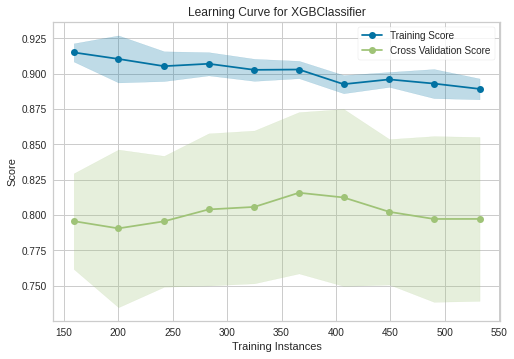

In [14]:
plot_model(estimator = xgb, plot = 'learning')

## Features Importance <a id="14.2"></a>

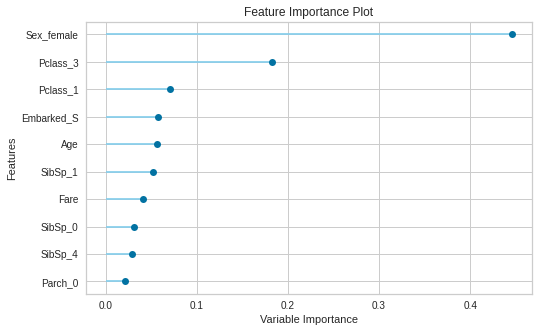

In [15]:
plot_model(estimator = xgb, plot = 'feature')

## ROC Curve <a id="14.3"></a>

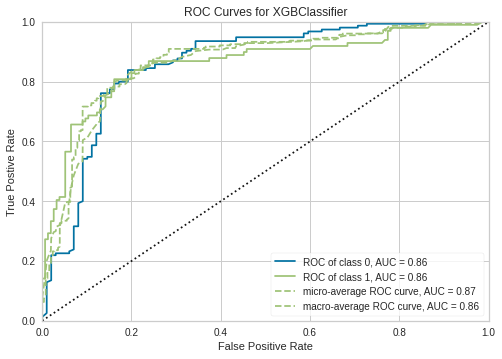

In [16]:
plot_model(estimator = xgb, plot = 'auc')

## Confusion Matrix <a id="14.4"></a>

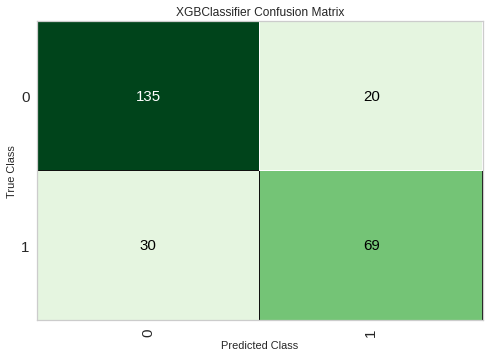

In [17]:
plot_model(estimator = xgb, plot = 'confusion_matrix')

# Model Interpretation <a id="15"></a>

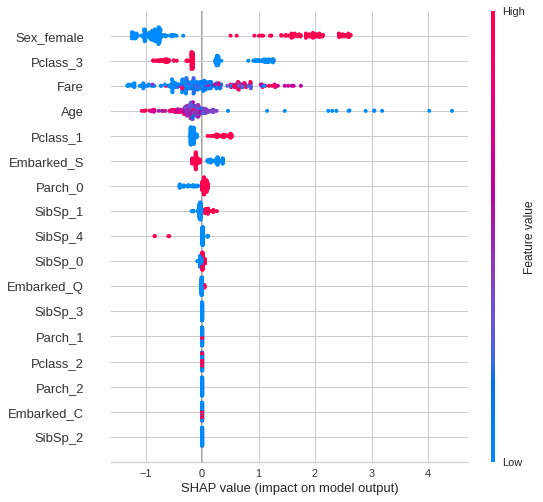

In [18]:
interpret_model(xgb)

# Make Prediction <a id="16"></a>

In [19]:
predictions = predict_model(xgb, data=test)
predictions.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Label   Score  
0  34.5      0      0   330911   7.8292   NaN        Q      0  0.0433  
1  47.0      1      0   363272   7.0000   NaN        S      0  0.1452  
2  62.0      0      0   240276   9.6875   NaN        Q      0  0.1144  
3  27.0      0      0   315154   8.6625   NaN        S      0  0.0916  
4  22.0      1      1  3101298  12.2875   NaN        S      0  0.4321

# Submit Result <a id="17"></a>

In [20]:
submission['Survived'] = round(predictions['Score']).astype(int)
submission.to_csv('submission.csv',index=False)
submission.head(10)

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0

<center>
  <FONT size="10" color = 'red'>Thank you, I hope you enjoyed.</FONT>
</center>